## Importing Pandas for Reading CSV Files

In [52]:
import pandas as pd 

In [54]:
cleaned_calls = pd.read_csv(r"C:\Users\Rahul Gupta\Desktop\cleaned data\Cleaned_Calls.csv")
cleaned_calls_reason = pd.read_csv(r"C:\Users\Rahul Gupta\Desktop\cleaned data\Cleaned_calls_reason.csv")
cleaned_customer_data = pd.read_csv(r"C:\Users\Rahul Gupta\Desktop\cleaned data\cleaned_customer_data.csv")
cleaned_sentiment = pd.read_csv(r"C:\Users\Rahul Gupta\Desktop\cleaned data\Cleaned_Sentiment.csv")
test_data = pd.read_csv(r"C:\Users\Rahul Gupta\Desktop\cleaned data\test.csv")


In [62]:
merged_data = pd.merge(cleaned_calls, cleaned_calls_reason[['call_id', 'primary_call_reason']], on='call_id')
merged_data = pd.merge(merged_data, cleaned_sentiment[['call_id', 'agent_tone', 'customer_tone', 'average_sentiment']], on='call_id')
merged_data = pd.merge(merged_data, cleaned_customer_data[['customer_id', 'elite_level_code']], on='customer_id')
merged_data.head()from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

,call_id,customer_id,agent_id,call_start_date,call_start_time,agent_start_date,agent_start_time,call_end_date,call_end_time,primary_call_reason,agent_tone,customer_tone,average_sentiment,elite_level_code
0,4667960400,2033123310,963118,2024-07-31,23:56:00,2024-08-01,00:03:00,2024-08-01,00:34:00,Voluntary_Cancel,neutral,angry,-0.04,4.0
1,1122072124,8186702651,519057,2024-08-01,00:03:00,2024-08-01,00:06:00,2024-08-01,00:18:00,Booking,calm,neutral,0.02,0.0
2,6834291559,2416856629,158319,2024-07-31,23:59:00,2024-08-01,00:07:00,2024-08-01,00:26:00,Irrops,neutral,polite,0.13,0.0
3,2266439882,1154544516,488324,2024-08-01,00:05:00,2024-08-01,00:10:00,2024-08-01,00:17:00,Upgrade,neutral,frustrated,-0.20,2.0
4,1211603231,5214456437,721730,2024-08-01,00:04:00,2024-08-01,00:14:00,2024-08-01,00:23:00,Seating,neutral,polite,0.05,0.0


## Importing Machine Learning Libraries

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

## Extracting Call Duration From Merged_data

In [64]:

merged_data['call_start_datetime'] = pd.to_datetime(merged_data['call_start_date'] + ' ' + merged_data['call_start_time'])
merged_data['call_end_datetime'] = pd.to_datetime(merged_data['call_end_date'] + ' ' + merged_data['call_end_time'])
merged_data['call_duration'] = (merged_data['call_end_datetime'] - merged_data['call_start_datetime']).dt.total_seconds()



## Feeding Input and Output To Feature and Target Column

In [103]:
features = merged_data[['call_duration', 'average_sentiment', 'elite_level_code', 'agent_tone', 'customer_tone']]
target = merged_data['primary_call_reason']


In [113]:
categorical_features = ['agent_tone', 'customer_tone']

## Separating Training and Testing Data

In [105]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


## Using OneHotEncoding 

In [115]:
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

In [117]:
features_transformed = transformer.fit_transform(features)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.3, random_state=42)

In [123]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Pridicting The Data on the basis of Test Data

In [131]:
y_pred = rf_model.predict(X_test)


In [133]:
classification_report_output = classification_report(y_test, y_pred)


In [134]:
from sklearn.metrics import classification_report
import pandas as pd

classification_report_dict = classification_report(y_test, y_pred, output_dict=True)

classification_report_df = pd.DataFrame(classification_report_dict).transpose()

print(classification_report_df)


                       precision    recall  f1-score       support
Baggage                 0.057751  0.045346  0.050802    838.000000
Booking                 0.189857  0.190850  0.190352    765.000000
Check_In                0.052506  0.039568  0.045128    556.000000
Checkout                0.066059  0.051146  0.057654    567.000000
Communications          0.071259  0.050804  0.059318   1181.000000
Digital_Support         0.005319  0.002597  0.003490    385.000000
Disability              0.022222  0.008333  0.012121    120.000000
Etc                     0.020202  0.014235  0.016701    281.000000
Irrops                  0.232074  0.291624  0.258464   3940.000000
Mileage_Plus            0.241881  0.248705  0.245246   1737.000000
Other_Topics            0.052326  0.035714  0.042453    252.000000
Post_Flight             0.085532  0.071756  0.078041   1310.000000
Products&Services       0.029126  0.019737  0.023529    152.000000
Products_And_Services   0.045171  0.033958  0.038770    854.00

In [143]:
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=transformer.get_feature_names_out())

X_test_df['predicted_primary_call_reason'] = y_pred

X_test_df.head()


,one_hot__agent_tone_angry,one_hot__agent_tone_calm,one_hot__agent_tone_frustrated,one_hot__agent_tone_neutral,one_hot__agent_tone_polite,one_hot__customer_tone_angry,one_hot__customer_tone_calm,one_hot__customer_tone_frustrated,one_hot__customer_tone_neutral,one_hot__customer_tone_polite,remainder__call_duration,remainder__average_sentiment,remainder__elite_level_code,predicted_primary_call_reason
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,540.0,0.12,1.0,Irrops
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,840.0,0.02,0.0,Irrops
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,900.0,0.02,2.0,Voluntary_Change
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,720.0,0.20,1.0,Voluntary_Change
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,600.0,0.00,4.0,Mileage_Plus


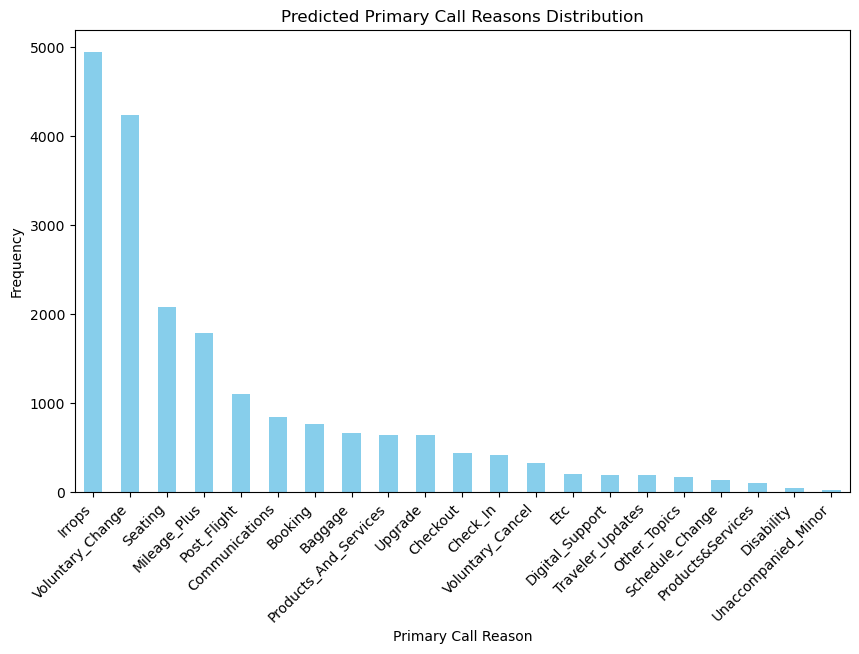

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
X_test_df['predicted_primary_call_reason'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Predicted Primary Call Reasons Distribution')
plt.xlabel('Primary Call Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()
